## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [93]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [503]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv",)
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [146]:
# your code here
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [401]:
# количественные: duration, amount, age
# бинарные: telephone, foreign_worker, credit_risk
# порядковые: status, savings, employment_duration, installment_rate, number_credits, people_liable
# категориальные: credit_history, purpose, personal_status_sex, other_debtors, present_residence, property, 
# other_installment_plans, housing, job

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [53]:
# your code here
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [64]:
# your code here
# also help, please
print((((data["age"] < 30) & (data["housing"] == "rent")).sum() / (data["age"] < 30).sum()) * 100)
print((((data["age"] > 40) & (data["housing"] == "rent")).sum() / (data["age"] > 40).sum()) * 100)

66.66666666666666
68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [92]:
# your code here
print(data["number_credits"].unique(), data["foreign_worker"].unique())
print(((data["foreign_worker"] == "yes") & ((data["number_credits"] == '4-5') | (data["number_credits"] == '>= 6'))).sum())

['1' '2-3' '4-5' '>= 6'] ['no' 'yes']
1


### Задание 6 (1 балл)

In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

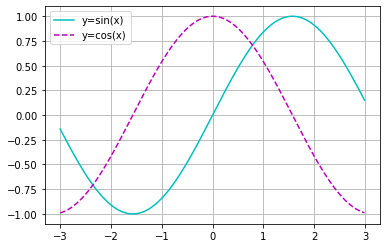

In [135]:
# your code here
x = arange(-3.0, 3.0, 0.01)
plt.plot(x, np.sin(x), c='c', label="y=sin(x)")
plt.plot(x, np.cos(x), ls='--', c='m', label="y=cos(x)")
plt.legend()
plt.grid()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

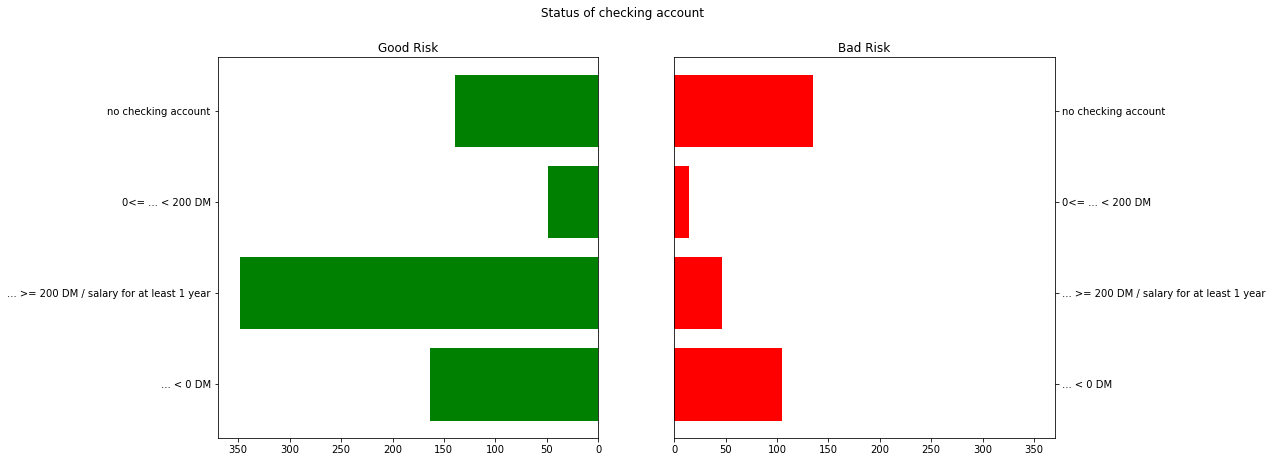

In [402]:
# your code here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle('Status of checking account')

good = data[data['credit_risk'] == "good"]['status'].value_counts()
bad = data[data['credit_risk'] == "bad"]['status'].value_counts()

ytickgood = sorted(good.index.values)
xgood = good[ytickgood].values
ygood = np.arange(len(good))

ytickbad = sorted(bad.index.values)
xbad = bad[ytickbad].values
ybad = np.arange(len(bad))

ax1.barh(ygood, xgood, tick_label=ytickgood, color='green')
ax1.set_title('Good Risk')
ax1.set_xlim(370, 0)
ax1.set(xticks=np.arange(0, 400, 50))

ax2.barh(ybad, xbad, tick_label=ytickbad, color='red')
ax2.yaxis.tick_right()
ax2.set_title('Bad Risk')
ax2.set_xlim(0, 370)
ax2.set(xticks=np.arange(0, 400, 50))

plt.show()


### Задание 8  (0.5 балла)

In [274]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

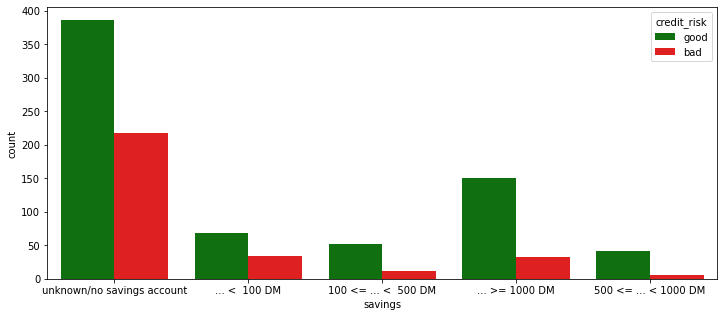

In [511]:
# your code here
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x=data["savings"], hue=data["credit_risk"], palette=['green', 'red'])
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

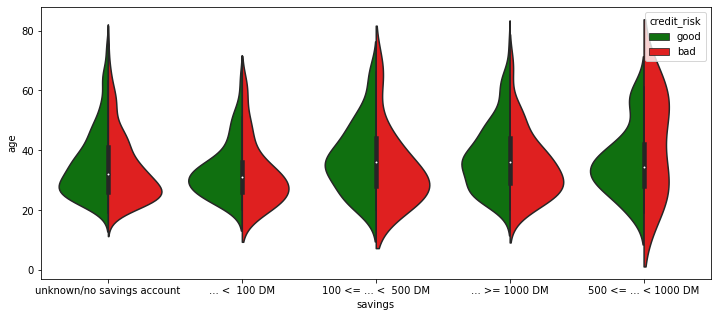

In [364]:
# your code here
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.violinplot(x=data["savings"], y=data["age"], hue=data["credit_risk"], palette=['green', 'red'], split=True)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

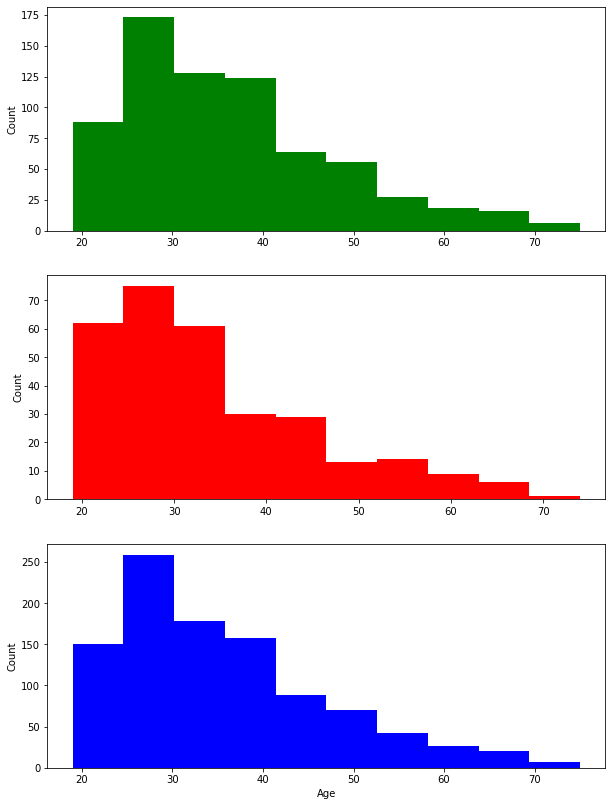

In [527]:
# your code here
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,14))

ax1.hist(data[data["credit_risk"] == "good"]["age"], color="green")
ax1.set_ylabel("Count")

ax2.hist(data[data["credit_risk"] == "bad"]["age"], color="red")
ax2.set_ylabel("Count")

ax3.hist(data["age"], color="blue")
ax3.set_ylabel("Count")
ax3.set_xlabel("Age")

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

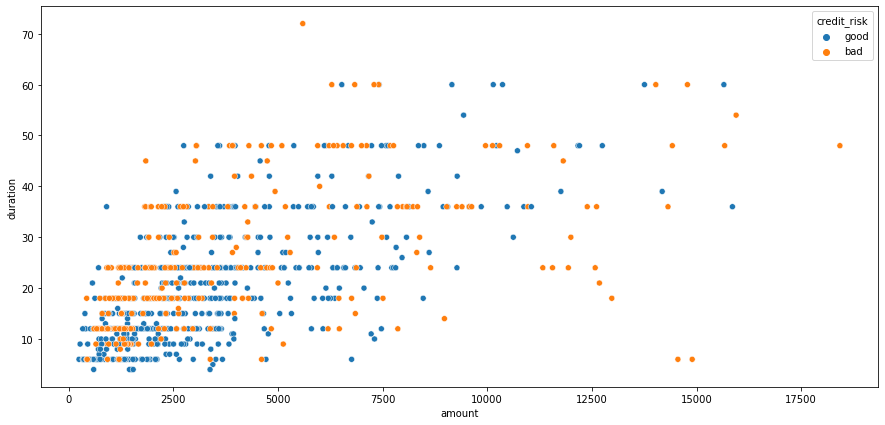

In [413]:
# your code here
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.scatterplot(x='amount', y='duration', hue="credit_risk", data=data)
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

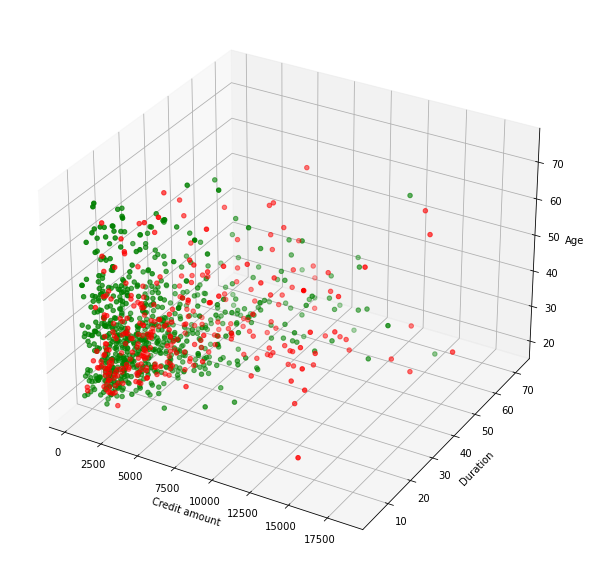

In [445]:
# your code here
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

ax.scatter(data[data.credit_risk == 'good']["amount"], data[data.credit_risk == 'good']["duration"], data[data.credit_risk == 'good']["age"], color = 'green')
ax.scatter(data[data.credit_risk == 'bad']["amount"], data[data.credit_risk == 'bad']["duration"], data[data.credit_risk == 'bad']["age"], color = 'red')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [500]:
# your code here
from sklearn.preprocessing import OneHotEncoder

# ATTENTION! Code from stackoverflow

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

data1 = MultiColumnLabelEncoder().fit_transform(data)

data1


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,13,0,2,116,4,2,2,0,2,...,1,2,1,0,0,1,0,0,0,1
1,3,5,0,5,528,4,0,1,3,2,...,3,17,1,0,1,1,1,0,0,1
2,0,8,4,8,72,0,1,1,0,2,...,3,4,1,0,0,3,0,0,0,1
3,3,8,0,5,398,4,0,0,3,2,...,3,20,1,0,1,3,1,0,1,1
4,3,8,0,5,411,4,0,2,3,2,...,1,19,0,2,1,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,17,4,4,375,4,0,1,3,2,...,3,2,1,0,0,3,1,0,0,0
996,3,17,4,5,438,4,3,2,3,0,...,3,26,1,2,0,1,0,0,0,0
997,1,15,0,5,907,1,3,2,3,2,...,2,11,1,1,0,0,0,1,0,0
998,0,8,4,4,799,1,4,1,3,2,...,2,33,1,2,0,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [17]:
def predict(Xtest: np.array) -> np.array:
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))